# Linear Algebra Formulation for Support Vector Machines
1. [The Goal of Support Vector Machines](#goal)
2. [Vectors](#vectors)
3. [Understanding the Equation of a Hyperplane](#hyperplane)
4. [How do we find the optimal Hyperplane?](#optimal_hyperplane)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

from sklearn.svm import SVC

## The Goal of Support Vector Machines <a name="goal"></a>
>"To find the optimal separating hyperplane which maximizes the margin of the training data"

### What is a "Separating Hyperplane"?

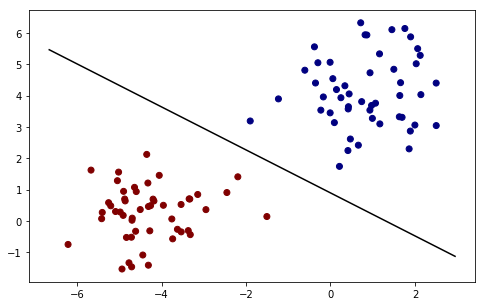

In [4]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')

# Create support vector classifier
svc = SVC(kernel='linear')

# Train model
clf = svc.fit(X, y)

# Get x and y lims
ax_1 = plt.gca()
xlim = ax_1.get_xlim()
ylim = ax_1.get_ylim()

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1], 100)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot optimal separating hyperplane
plt.plot(xx, yy, 'k-')

fig = plt.gcf() 
fig.set_size_inches(8,5)
plt.savefig('Support_Vector_Machines/Figures/hyp.png')

This is an intuitive example of a hyperplane in 2-dimensions. This definition can be generalized and expanding to any number of dimensions!
* In 1-D, a hyperplane is a point
* In 2-D, a hyperplane is a line
* In 3-D, a hyperplane is a plane
* In 4-D+, it is simply referred to as a hyperplane.

### What is the optimal separating hyperplane?

It appears that there can be many different separating hyperplanes (often there is infinite). How do we choose the optimal one? Remember, the goal of the SVM is to maximize the margin of the training data. In other words, we're going to choose the hyperplane that is as far away as possible from each class of datapoints

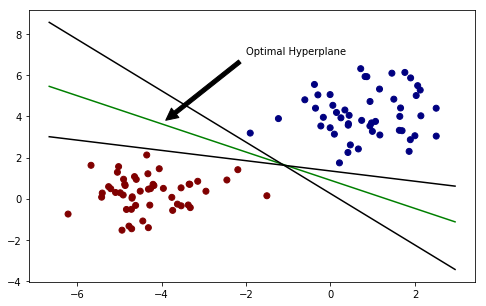

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')


# Get x and y lims
ax_1 = plt.gca()
xlim = ax_1.get_xlim()
ylim = ax_1.get_ylim()

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1], 100)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot optimal separating hyperplane
plt.plot(xx, yy, 'k-', c='g')

#annotating optimal hyperplane
ax_1.annotate('Optimal Hyperplane', xy=(-4, 3.65), xytext=(-2, 7),
            arrowprops=dict(facecolor='black', shrink=0.05),)

# plot other hyperplanes
y1 = -1.25 * xx + .25
plt.plot(xx, y1, 'k-')
y2 = -.25 * xx + 1.35
plt.plot(xx, y2, 'k-')

fig = plt.gcf() 
fig.set_size_inches(8,5)
plt.savefig('Support_Vector_Machines/Figures/opt_hyp.png')

### Why choose Hyperplane that maximizes the margin of the training data?
It generalizes better to classifying unseen observations -> (makes better predictions)

## Vectors <a name="vectors"></a>
The data points that we work with (we generally think of these in terms of spreadsheets) can be interpreted as vectors, which we can then plot! (in this graph, for simplicity, I only graphed 5 data points).

In [4]:
spreadsheet = pd.DataFrame(np.round(X[1:6,:], 1), columns = ['Feature 1 (X_1)', 'Feature 2 (X_2)']).head()

$X_1=\left[\begin{matrix}
-2.9\\
-3.4\\
1.9\\
-4.8\\
1.6
\end{matrix}
\right],\ 
X_2 = \left[\begin{matrix}
0.4\\
-0.3\\
2.9\\
-1.3\\
3.3
\end{matrix}
\right]
$

<p float="left">
  <img src="Figures/spreadsheet_to_vectors.png" width="9000" />
</p>

Below, you'll see an enlarged version of the rightmost graph in the diagram above.

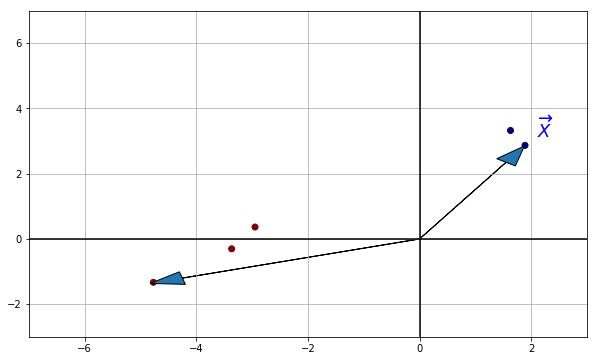

In [14]:
# Generating vectors_graph.png
plt.scatter(X[1:6,0], X[1:6,1], c=y[1:6], cmap = 'jet')
ax_1 = plt.gca()

#adding vectors
plt.arrow(0,0,-4.25,-1.2, head_width=.4)
plt.arrow(0,0,1.55,2.35, head_width = .4)


#plotting axes
ax_1.axhline(y=0, color='k')
ax_1.axvline(x=0, color='k')

# labeling X
ax_1.text(2.1, 3.1, r'$\overrightarrow{X}$', fontsize=18, color='b')


plt.grid(True)
plt.xlim(-7,3)
plt.ylim(-3,7)

fig = plt.gcf() 
fig.set_size_inches(10,6)
fig.savefig('Figures/vectors_graph.png')
#plt.close(fig) 

### What is a vector?
> Vector: A quantity having direction as well as magnitude.

* The magnitude of a vector (also called its norm) is it's geometric length. For a vector $\overrightarrow{v}$, its magnitude is written as $||\overrightarrow{v}||$

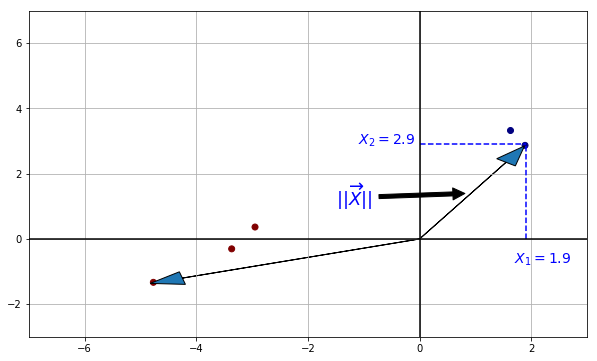

In [38]:
# Generating vectors_graph.png
plt.scatter(X[1:6,0], X[1:6,1], c=y[1:6], cmap = 'jet')
ax_1 = plt.gca()

#adding vectors
plt.arrow(0,0,-4.25,-1.2, head_width=.4)
plt.arrow(0,0,1.55,2.35, head_width = .4)

# adding X1 and X2
x1 = np.array([1.9,1.9])
y1 = np.array([0,2.9])
plt.plot(x1,y1, 'b--')
x2 = np.array([0,1.9])
y2 = np.array([2.9,2.9])
plt.plot(x2,y2, 'b--')

# annotating
ax_1.text(1.7, -.75, r'$X_1=1.9}$', fontsize=14, color = 'b')
ax_1.text(-1.1, 2.9, r'$X_2=2.9}$', fontsize=14, color = 'b')
#ax_1.text(2.1, 3.1, r'$\overrightarrow{X}$', fontsize=18, color='b')

#annotating norm of X
ax_1.annotate(r'$||\overrightarrow{X}||$',fontsize=18, color='b', xy=(.9,1.4), xytext=(-1.5,1),
            arrowprops=dict(facecolor='black', shrink=0.05),)

#plotting axes
ax_1.axhline(y=0, color='k')
ax_1.axvline(x=0, color='k')

plt.grid(True)
plt.xlim(-7,3)
plt.ylim(-3,7)

fig = plt.gcf() 
fig.set_size_inches(10,6)

Now, we have (you can think of them as lengths) $X_1$ and $X_2$, we calculate the magnitude of $\overrightarrow{X}$, (which is the magnitude of $\overrightarrow{X}$, written $||\overrightarrow{X}||$) using Pythagorea's theorem:
$$a^2+b^2=c^2$$
Adapted for our purposes, we get that $$\sqrt{(X_1)^2+(X_2)^2}=||\overrightarrow{X}||$$

* The direction vector is calculated by dividing each element of the vector by its norm.
So, 
$$\text{given $\overrightarrow{X}$}=\left[\begin{matrix}X_1\\X_2\end{matrix}\right],\  \text{the direction of $\overrightarrow{X}$ is calculated as:}\ \left[\begin{matrix}\frac{X_1}{||\overrightarrow{X}||}\\\frac{X_2}{||\overrightarrow{X}||}\end{matrix}\right]$$

It's important to note that **the magnitude of a vector is a real number, while the direction of a vector is another vector.**

### Dot Product
The dot product has many different names across fields of mathematics: inner product, and linear combination are also common. Regardless of its name, it is a useful operation to use between vectors. To put it simply, if you take the dot product of two vectors, you multiply all their corresponding elements and take the sum.
(note that the vectors must have the same dimensions)

If we have two vectors:
$$\overrightarrow{X}=\left[\begin{matrix}X_1\\X_2\end{matrix}\right], \overrightarrow{Y}=\left[\begin{matrix}Y_1\\Y_2\end{matrix}\right]$$

Then the dot product is calculated as follows:
$$\overrightarrow{X} \cdot \overrightarrow{Y}= \sum_{i=1}^{2}X_iY_i = X_1Y_1+X_2Y_2$$

note: in linear algebra, the inner product is represented like so: $\langle \overrightarrow{X}, \overrightarrow{Y} \rangle$

**add the geometric respresentation of the dot prouct! Just put it in a different notebook and link to it**
[this explanation by Alexandre Kowalczyk](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/) is the best

### Vector Projections

When it comes to determining the optimal hyperplane (i.e. the one that maximizes the margin of the training data) we will conveniently use a vector operation called "vector projections". 
Say we have two vectors, $\overrightarrow{u}$ and $\overrightarrow{v}$, such that:

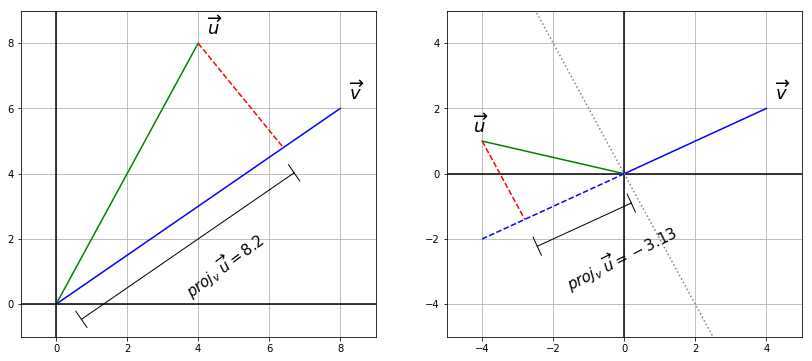

In [132]:
# define figure and add subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

x1 = np.linspace(0,8,2)
x2 = np.linspace(0,4,2)
x3 = np.linspace(4, 6.4, 2)

######################
#  Ax1
######################
# plotting vectors
ax1.plot(x1, .75*x1, c='b')
ax1.plot(x2, 2*x2, c='g')


# annotating
ax1.text(4.25, 8.25, r'$\overrightarrow{u}$', fontsize=18)
ax1.text(8.25, 6.25, r'$\overrightarrow{v}$', fontsize=18)
ax1.annotate("",
            xy=(2/3, -.5), xycoords='data',
            xytext=(6.75, 4.0625), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),)
ax1.text(3.5, 1.75, r"$proj_{v}\ \overrightarrow{u}=8.2$", rotation=36.87,
            size=15)

    
ax1.set_xlim(0,10)
ax1.set_ylim(0,10)

# calculate projection of u onto v
u = np.array([4,8])
v = np.array([8,6])
proj_u_onto_v = ((np.dot(u,v))/np.linalg.norm(v) ** 2) * v

# plot projection
#plt.plot(x3, (proj_u_onto_v[1] / proj_u_onto_v[0]) * x3, 'r--' )
ax1.plot(x3, (-4/3 * x3 + (40/3)), 'r--' )

ax1.set_xlim(-1,9)
ax1.set_ylim(-1,9)
ax1.grid(True)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

######################
#  Ax2
######################
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.grid(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')

# plotting Vectors
ax2.plot(np.array([0,4]), np.array([0,2]), color='b')
ax2.plot(np.array([0,-4]), np.array([0,1]), color='g')
# dotted
ax2.plot(np.array([0,-4]), np.array([0,-2]), 'b--')
x4 = np.linspace(-4,-2.8,2)
ax2.plot(x4, -2*x4-7, 'r--')

# annotating
ax2.text(4.25, 2.25, r'$\overrightarrow{v}$', fontsize=18)
ax2.text(-4.25, 1.25, r'$\overrightarrow{u}$', fontsize=18)
ax2.annotate("",
            xy=(.25, -.875), xycoords='data',
            xytext=(-2.5, -2.25), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),)
ax2.text(-1.75, -2., r"$proj_{v}\ \overrightarrow{u}=-3.13$", rotation=26.57,size=15)

#perpendicular hyperplane
x5 = np.linspace(-4,4,2)
ax2.plot(x5, -2 * x5, color='grey', linestyle=':')

$$\overrightarrow{u}=\left[\begin{matrix}4\\8\end{matrix}\right],\ \overrightarrow{v}=\left[\begin{matrix}8\\6\end{matrix}\right]
\hspace{7cm}
\overrightarrow{u}=\left[\begin{matrix}-4\\1\end{matrix}\right],\ \overrightarrow{v}=\left[\begin{matrix}4\\2\end{matrix}\right]
\qquad\qquad\qquad$$

Note: $proj_{v}\ \overrightarrow{u}$ is actually another vector, but we can prove that (**insert a link to that proof here!**) we can find it's length (magnitude) by multiplying $\overrightarrow{u}$ with the direction of $\overrightarrow{v}$. Notice, again that this magnitude can be either positive or negative. (it can alos be proven that if the angle between the two vectors is greater than 90 degress, the magnitude of the projection will be negative.

Lastly, take a look at the faint grey line in the graph on the right. Notice that the magnitude of $proj_{v}\ \overrightarrow{u}$ also gives us the distance from the datapoint to the grey line. Now, remember, when we want to find the optimal separating hyperplane, which maximizes the margin, we need to calculate how far away each datapoint is from the hyperplane. Projecting each datapoint onto the line perpendicular to the hyperplane gives us an avenue to do so. 

**Don't forget to make another notebook with geometric formulation for the vector projection**

## Understanding the Equation of a Hyperplane <a name="hyperplane"></a>

As we've seen previously, the separating hyperplane that we keep referring to (in 2-d) is just a line. I'm confident that you're familiar with the way we define lines:
$$y=mx+b$$
With a bit of algebraic manipulation, we get:
\begin{align*}
y&=mx+b\\
-b-mx+y&=0
\end{align*}

Now, a quick refresher that b is just a constant that represents the y-intercept, m (usually defines the slope) is a coefficient to the variable x (also a constant) and the variable y even has a coefficient as well, in this case it's 1. You can imagine that as we expand this equation of a hyperplane to more and more dimensions, we'd quickly run out of letters, which is why it's common convention to represent all constants with $\beta$ and all variables with $X$. Using this notation, the equation of a line is:
$$\beta_0+\beta_1X_1+\beta_2X_2=0$$
and more generally, for $p$ dimensions, the equation for a hyperplane is:
$$\beta_0+\beta_1X_1+\beta_2X_2+\dots+\beta_pX_p=0$$

Remember the dot product? It's worth pointing out that this equation for a hyperplane is just the dot product of two vectors!
$$\overrightarrow{\beta}\cdot\overrightarrow{X}=
\left[\begin{matrix}\beta_1\\\beta_2\end{matrix}\right] \cdot
\left[\begin{matrix}X_1\\X_2\end{matrix}\right]=
\beta_1X_1+\beta_2X_2
=0$$

Since the dot product of these two vectors is equal to 0 then by definition, (**link the definition here**) the two vectors are perpendicular. (this is more formally referred to as orthogonal.

### Equation of a hyperplane summary:
There are two main reasons that we define a hyperplane like so:
$$\beta_0+\beta_1X_1+\beta_2X_2+\dots+\beta_pX_p=0$$

1. It is much easier to use this representation with many dimensions
2. Setting the hyperplane equal to zero implies that the vector of coefficients is perpendicular to the vectors of variables, which as we say with the faint grey line on the graph above, allows us to calculate the distance from each datapoint to the hyperplane.

## How do we find the optimal hyperplane? <a name="optimal_hyperplane"></a>

1. Define Hinge Loss Function
2. Minimize Hinge loss function with Stochastic Gradient Descent